In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
most_recent_date = session.query(measurement.date).filter(measurement.date )
for row in most_recent_date:
    print(row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

In [11]:
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [12]:
new_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
new_year

datetime.date(2016, 8, 23)

In [13]:
data_measurement = session.query(measurement.station, measurement.date, measurement.prcp, measurement.tobs).filter(measurement.date == new_year)
data_measurement

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.

last_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_scores =  session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_scores, columns= ["precipitation", "Date"])
# Sort the dataframe by date
df_sorted = df.sort_values("Date")
df_sorted
# Use Pandas Plotting with Matplotlib to plot the data


,precipitation,Date
0,2016-08-23,0.0
1127,2017-03-10,0.0
1130,2017-03-15,0.0
1136,2017-03-31,0.0
1139,2017-04-05,0.0
...,...,...
2212,2017-08-06,NaN
2217,2017-08-11,NaN
2219,2017-08-13,NaN
2224,2017-08-18,NaN


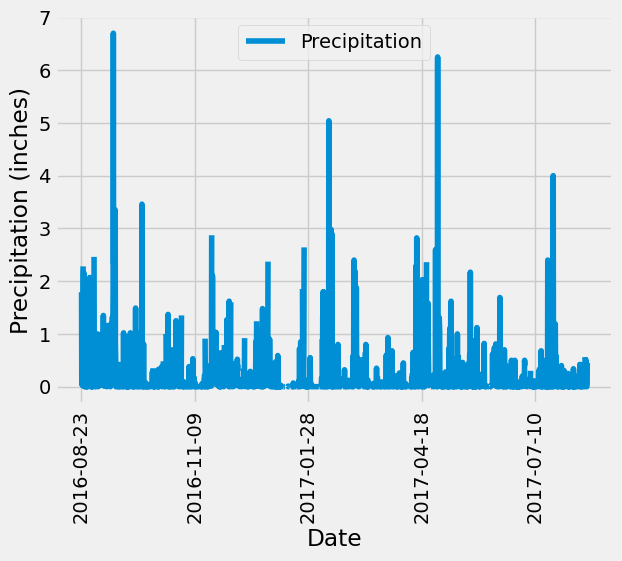

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(measurement.date)).first()

# Calculate the date one year from the last date in data set.
new_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_measurement = session.query(measurement.date, measurement.prcp).filter(measurement.date >= new_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = [(record.date, record.prcp) for record in data_measurement]
df_data_measurement = pd.DataFrame(data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
# df_data_measurement_sorted = df_data_measurement.sort_values(by='Date', ascending=False)
# # Use Pandas Plotting with Matplotlib to plot the data

# plt.plot(df_data_measurement_sorted['Date'], df_data_measurement_sorted['Precipitation'])
# plt.xlabel('Date')
# plt.ylabel('Precipitation (inches)')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

df_plot = df_data_measurement.sort_values('Date')
df_plot.plot(x="Date", y='Precipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_data_measurement.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f0671e9540>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [18]:
stations = session.query(measurement.station).distinct().all()
stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(measurement.station, func.count(measurement.station))\
.group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
temperature_stats = session.query(func.min(measurement.tobs).label('min_temp'),
    func.max(measurement.tobs).label('max_temp'),
    func.avg(measurement.tobs).label('avg_temp')
).filter(measurement.station == most_active_station_id).all()
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

In [21]:
active_measurement = session.query(measurement.tobs)

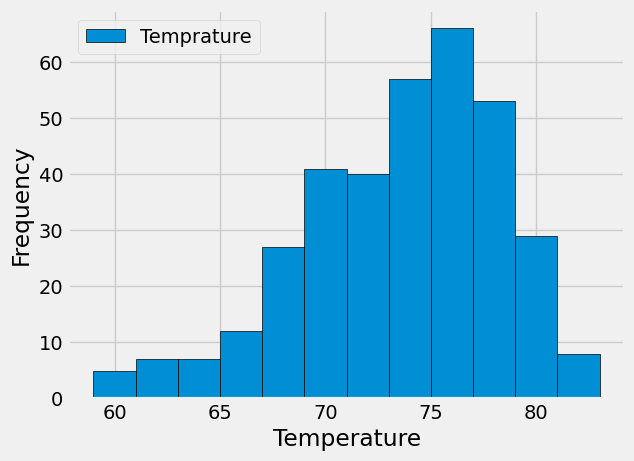

In [26]:
new_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

active_measurement = session.query(measurement.tobs).filter(measurement.station == most_active_station_id, measurement.date >= new_year).all()

df_measurement = pd.DataFrame(active_measurement, columns = ["Temprature"])
df_measurement['Temprature'] = pd.to_numeric(df_measurement['Temprature'], errors='coerce')
df_measurement.plot.hist(bins=12, edgecolor='black', label='TOBS Data')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()